In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import statistics
import scipy.io
import h5py
import sys
import warnings
import seaborn as sns
import pandas as pd
from collections import OrderedDict
import scipy.stats
import dabest

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import networkx
from place_map_quality import GraphAnalysis

In [4]:
# For plotting styles
if sys.platform == 'darwin':
    MainFolder = '/Users/seethakrishnan/Box Sync/NoReward/'
else:
    MainFolder = '/home/sheffieldlab/Desktop/NoReward/'

PlottingFormat_Folder = os.path.join(MainFolder, 'Scripts/PlottingTools/')
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

In [5]:
SaveFigureFolder = '/Users/seethakrishnan/Box Sync/NoReward/PaperFigures/Networkfigures/'

In [6]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Full/Reward/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Full/Task1_Task2/'
ga_reward = GraphAnalysis(FolderName, AdjFolderName, TaskName='Reward', newbins=4)

In [7]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/sigPF/Control/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/sigPF/Task1_Task1/'
ga_control= GraphAnalysis(FolderName, AdjFolderName, TaskName='Control',newbins=4)

In [8]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Full/NoReward/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Full/Task3b_Task4/'
ga_noreward = GraphAnalysis(FolderName, AdjFolderName, TaskName='Noreward',newbins=4)

In [9]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Remapping_Shuffle/NetworkAnalysis/Shuffle/Novel/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Remapping_Shuffle/NetworkAnalysis/Shuffle/Task1_Task4/'
ga_novel = GraphAnalysis(FolderName, AdjFolderName, TaskName='Novel',newbins=4)

In [10]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Shuffle/Shuffle/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Shuffle/Task1_Task2/'
ga_shuffle = GraphAnalysis(FolderName, AdjFolderName, TaskName='Shuffle',newbins=4)

## Estimation stats

In [49]:
combined_df = pd.concat((ga_reward.csv_combined, ga_noreward.csv_combined, ga_control.csv_combined, 
                         ga_novel.csv_combined, ga_shuffle.csv_combined))
columns = ['Weighted Degree',  'Clustering Coefficient']


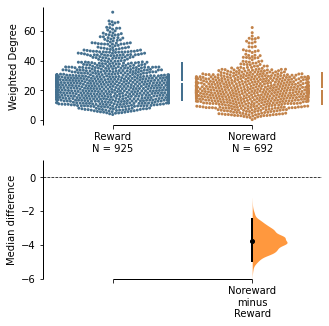

In [69]:
# Produce a Cumming estimation plot.
fs, ax = plt.subplots(1, figsize=(5, 5))
# Load the above data into `dabest`.
data_dabest = dabest.load(data=combined_df, x="TaskName", y=columns[0],
                          idx=(('Reward', 'Noreward')), resamples=5000)
fig = data_dabest.median_diff.plot(float_contrast=False,
                           raw_marker_size=3, es_marker_size=4, ax=ax, contrast_ylim=(-6, 1), 
                            reflines_kwargs={'linestyle':'dashed'});
ax.contrast_axes.locator_params(nbins=4)
fig.savefig(os.path.join(SaveFigureFolder, 'WeightedDegreedabestplot.pdf'),  bbox_inches='tight', transparent=True)

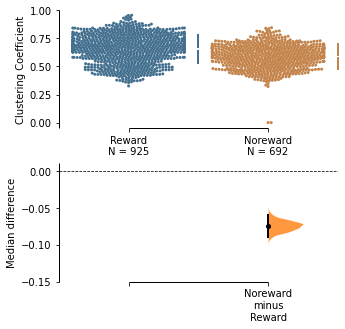

In [70]:
# Produce a Cumming estimation plot.
fs, ax = plt.subplots(1, figsize=(5, 5))
# Load the above data into `dabest`.
data_dabest = dabest.load(data=combined_df, x="TaskName", y=columns[1],
                          idx=(('Reward', 'Noreward')), resamples=5000)
fig = data_dabest.median_diff.plot(float_contrast=False, contrast_ylim=(-0.15, 0.01),
                           raw_marker_size=3, es_marker_size=4, ax=ax, 
                            reflines_kwargs={'linestyle':'dashed'});
ax.contrast_axes.locator_params(nbins=4)
fig.savefig(os.path.join(SaveFigureFolder, 'ClusteringCoeffdabestplot.pdf'),  bbox_inches='tight', transparent=True)

Column : Weighted Degree Control with Reward : 0.000
Column : Weighted Degree Control with Noreward : 0.000
Column : Weighted Degree Reward with Reward : 0.333
Column : Weighted Degree Reward with Noreward : 0.000
Column : Weighted Degree Noreward with Reward : 0.000
Column : Weighted Degree Noreward with Noreward : 0.333
Column : Clustering Coefficient Control with Reward : 0.000
Column : Clustering Coefficient Control with Noreward : 0.000
Column : Clustering Coefficient Reward with Reward : 0.333
Column : Clustering Coefficient Reward with Noreward : 0.000
Column : Clustering Coefficient Noreward with Reward : 0.000
Column : Clustering Coefficient Noreward with Noreward : 0.333


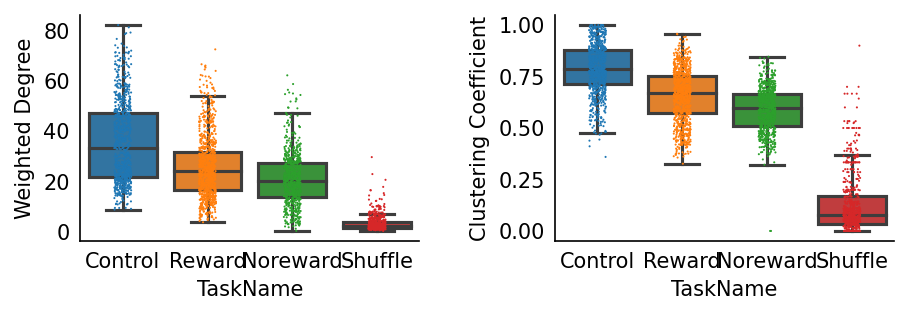

In [45]:
combined_df = pd.concat((ga_reward.csv_combined, ga_noreward.csv_combined, ga_control.csv_combined, 
                         ga_novel.csv_combined, ga_shuffle.csv_combined))
columns = ['Weighted Degree',  'Clustering Coefficient']
fs, ax = plt.subplots(1, len(columns), figsize=(8, 3), dpi=150, gridspec_kw={'wspace':0.4})
for n, c in enumerate(columns):
    sns.boxplot(x='TaskName', y=c, data=combined_df, order=['Control', 'Reward', 'Noreward', 'Shuffle'], 
                showfliers=False, ax=ax[n])
    sns.stripplot(x='TaskName', y=c, data=combined_df, order=['Control', 'Reward', 'Noreward', 'Shuffle'], 
                dodge=True, jitter=True, ax=ax[n], size=1)
    pf.set_axes_style(ax[n])
    
for c in columns:
    for t1 in ['Control', 'Reward', 'Noreward']:
        for t2 in ['Reward', 'Noreward']:
            d1 = combined_df[combined_df.TaskName==t1][c]
            d2 = combined_df[combined_df.TaskName==t2][c]
            t, p = scipy.stats.ttest_ind(d1, d2)
            print('Column : %s %s with %s : %0.3f' % (c, t1, t2, p/3))
            
fs.set_size_inches((7, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Networkproperties.pdf'),  bbox_inches='tight', transparent=True)

In [11]:
binned_df_Task1 = ga_reward.get_binned_parameters(ga_reward.csv_combined, columns)
binned_df_Task3 = ga_noreward.get_binned_parameters(ga_noreward.csv_combined, columns)
binned_df_Control = ga_control.get_binned_parameters(ga_control.csv_combined, columns)

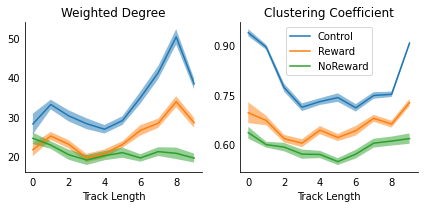

In [12]:
fs, ax = plt.subplots(1, len(columns), figsize=(6, 3), sharex='all')
ga_reward.plot_binned_parameters(ax, columns, binned_df_Control, plot_label='Control')
ga_reward.plot_binned_parameters(ax, columns, binned_df_Task1, plot_label='Reward')
ga_reward.plot_binned_parameters(ax, columns, binned_df_Task3, plot_label='NoReward')
# ga.plot_binned_parameters(ax, columns, binned_df_shuffle, plot_label='shuffle')
ax[-1].legend();
fs.tight_layout()
fs.savefig(os.path.join(SaveFigureFolder, 'Networkproperties_bytracklength_withControl.pdf'),  bbox_inches='tight', transparent=True)

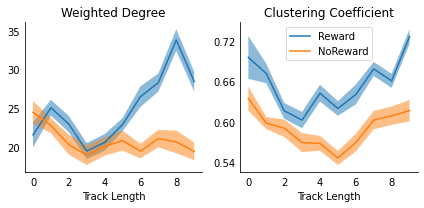

In [13]:
fs, ax = plt.subplots(1, len(columns), figsize=(6, 3), sharex='all')
# ga_reward.plot_binned_parameters(ax, columns, binned_df_Control, plot_label='Control')
ga_reward.plot_binned_parameters(ax, columns, binned_df_Task1, plot_label='Reward')
ga_reward.plot_binned_parameters(ax, columns, binned_df_Task3, plot_label='NoReward')
# ga.plot_binned_parameters(ax, columns, binned_df_shuffle, plot_label='shuffle')
ax[-1].legend();
fs.tight_layout()
fs.savefig(os.path.join(SaveFigureFolder, 'Networkproperties_bytracklength_withoutControl.pdf'),  bbox_inches='tight', transparent=True)

## Plot Ratios

In [72]:
combined_df = pd.concat((ga_reward.ratios, ga_noreward.ratios, ga_control.ratios))
mean_df = pd.melt(combined_df, id_vars=['TaskName'], value_vars=['WithinMean', 'BetweenMean'], 
                      var_name='Meantype', value_name='Mean')

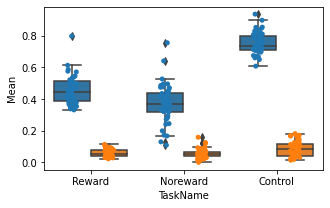

In [73]:
fs, ax = plt.subplots(1, figsize=(5, 3), sharex='all')
sns.boxplot(x='TaskName', y='Mean', hue='Meantype', data=mean_df, ax=ax)
sns.stripplot(x='TaskName', y='Mean', hue='Meantype', data=mean_df, dodge=True, ax=ax)
ax.legend_.remove()


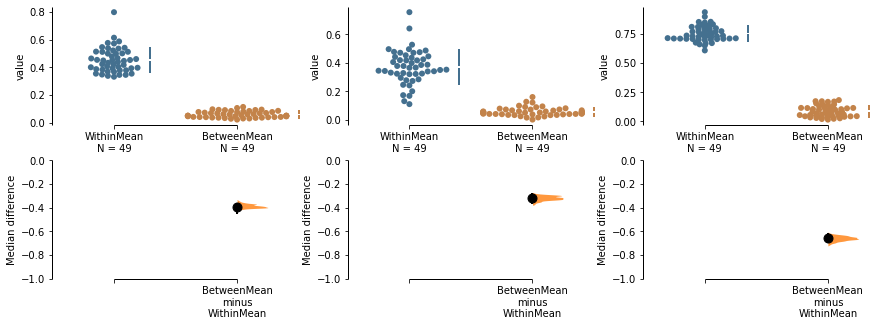

In [74]:
fs, ax = plt.subplots(1, 3, figsize=(15, 5), sharex='all')
for n, x in enumerate([ga_reward.ratios, ga_noreward.ratios, ga_control.ratios]):
    data_dabest = dabest.load(data=x, idx=(('WithinMean', 'BetweenMean')), resamples=1000)
    data_dabest.median_diff.plot(float_contrast=False, ax=ax[n], contrast_ylim=(-1, 0))

In [75]:
combined_df['TaskName'].unique()

array(['Reward', 'Noreward', 'Control'], dtype=object)

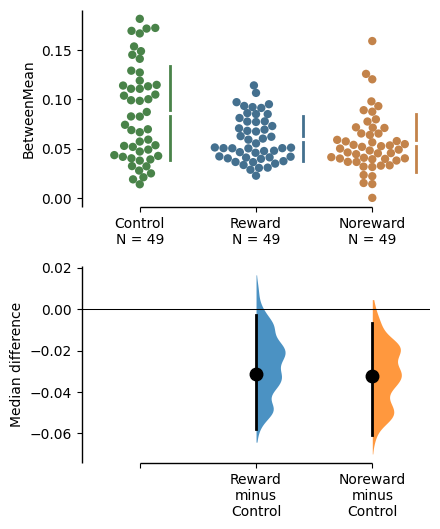

In [76]:
data_dabest = dabest.load(data=combined_df, x='TaskName', y='BetweenMean', 
                          idx=(('Control', 'Reward', 'Noreward')), resamples=1000)
data_dabest.median_diff.plot(float_contrast=False);

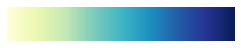

In [10]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, axes = plt.subplots(1)
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
axes.imshow(gradient, aspect='auto', cmap=plt.get_cmap('YlGnBu'))
axes.axis('off')
fig.set_size_inches((4, 0.5))
fig.savefig(os.path.join(SaveFigureFolder, 'Colormap_graphs.pdf'),  bbox_inches='tight', transparent=True)